##### 6.2 Exercises: histograms, box plots, and bullet charts
##### Name: Prashant Raghuwanshi
##### Date: 03/13/2022
##### Course: DSC640-T301 Data Presentation & Visualization (2223-1)

In [1]:
##### Import common Data preparation & visualization libraries:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import seaborn as sns
import plotly.express as px
import matplotlib

In [2]:
##### read source file education into dataframe
education_df = pd.read_csv('C:/Users/21313711/Documents/DSC640/ex6-2/ex6-2/education.csv')
##### display firt 5 records
education_df.head(5)

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6


In [3]:
##### read source file crime into dataframe
crime_df = pd.read_csv('C:/Users/21313711/Documents/DSC640/ex6-2/ex6-2/crimeratesbystate-formatted.csv')
##### display firt 5 records
crime_df.head(5)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1


In [4]:
##### read source file birth rate into dataframe
brate_df = pd.read_csv('C:/Users/21313711/Documents/DSC640/ex6-2/ex6-2/birth-rate.csv')
##### display firt 5 records
brate_df.head(5)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281


In [5]:
# fix whitespaces from dataset
education_df = education_df.applymap(lambda x: x.strip() if type(x) is str else x)
crime_df = crime_df.applymap(lambda x: x.strip() if type(x) is str else x)
brate_df = brate_df.applymap(lambda x: x.strip() if type(x) is str else x)

In [6]:
brate_hist = pd.melt(brate_df, id_vars="Country", var_name="Year", value_name = 'BirthRate').fillna(0)
brate_hist["BirthRate_rnd"] = brate_hist["BirthRate"].apply(lambda x: math.ceil(x))
brate_hist.head(5)

,Country,Year,BirthRate,BirthRate_rnd
0,Aruba,1960,36.400,37
1,Afghanistan,1960,52.201,53
2,Angola,1960,54.432,55
3,Albania,1960,40.886,41
4,Netherlands Antilles,1960,32.321,33


##### BOX Plot

[Text(0.5, 1.0, 'BOX PLOT - Python \n Outliars for India & USA')]

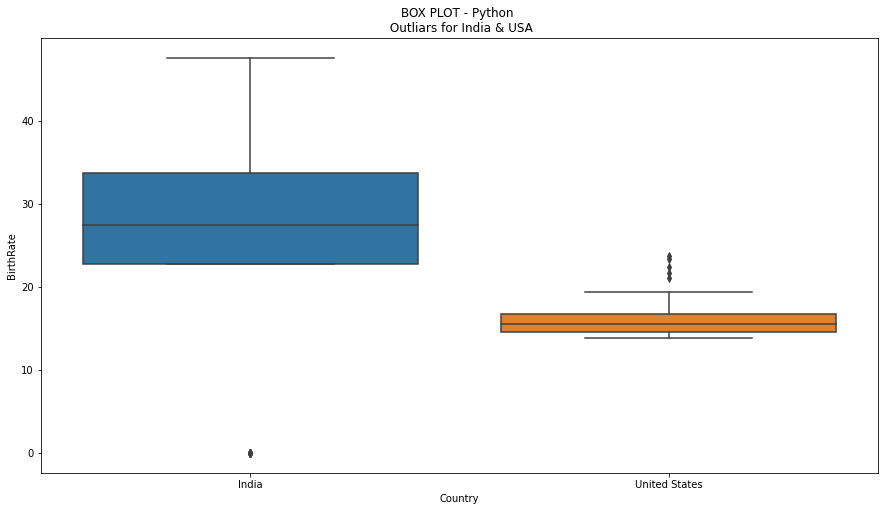

In [8]:
plt.figure(figsize=(15,8))
brate_box = brate_hist[(brate_hist["Country"]=="United States") | (brate_hist["Country"]=="India")]
sns.boxplot(x = brate_box["Country"], y=brate_box["BirthRate"]).set(title='BOX PLOT - Python \n Outliars for India & USA')

##### Histogram

C:\Users\21313711\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Histogram with line - Python \n Birth Rate Chart')]

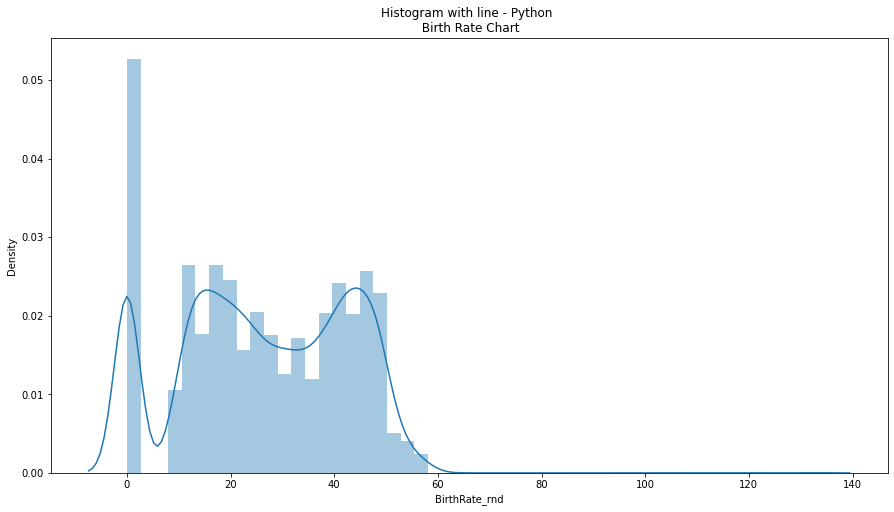

In [9]:
plt.figure(figsize=(15,8))
sns.distplot( brate_hist["BirthRate_rnd"] ).set(title='Histogram with line - Python \n Birth Rate Chart')

#### Bullet Chart

In [10]:
crime_bull = crime_df[crime_df["state"]=="United States"][["state","burglary"]]
crime_bull['target'] = 500
crime_bull_tuple = [tuple(x) for x in crime_bull.values][0]

<ipython-input-11-8a9bc453459e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(crime_bull_tuple[0])


Text(0.5, 1.0, 'Bullet Chart-python \n\n CRIME RATE in USA')

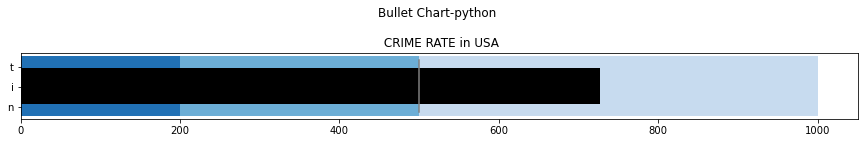

In [11]:
# set parameter for bullet chart
limits = [200, 500, 1000]
palette = sns.color_palette("Blues_r", len(limits))
fig, ax = plt.subplots(figsize=(15,8))
ax.set_aspect('equal')
#ax.set_yticks([1])
ax.set_yticklabels(crime_bull_tuple[0])
prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=75, color=palette[idx])
    prev_limit = lim
    # draw the value we're measuring
ax.barh([1], crime_bull_tuple[1], color='black', height=45)
ax.axvline(crime_bull_tuple[2], color="gray", ymin=0.10, ymax=0.9)
ax.set_title("Bullet Chart-python \n\n CRIME RATE in USA")

In [12]:
education_parallel = education_df[education_df['state'].isin(['New York','New Jersey','Delaware','Rhode Island','Pennsylvania'])][['state','writing','reading','math']]

##### Parallel Coordinate

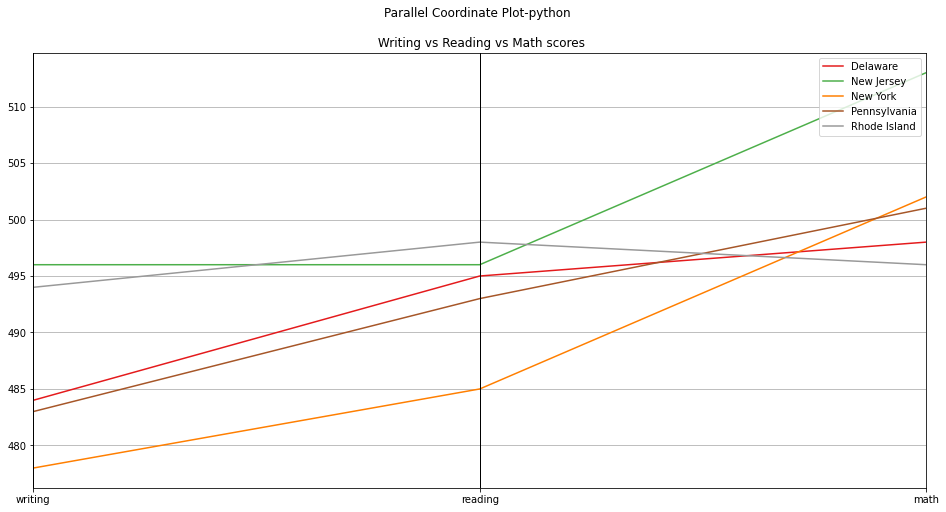

In [13]:
plt.figure(figsize=(16,8))
pd.plotting.parallel_coordinates(education_parallel, 'state', colormap=plt.get_cmap("Set1"))
plt.title("Parallel Coordinate Plot-python \n\n Writing vs Reading vs Math scores")
plt.show()